In [175]:
import numpy as np
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras.datasets import cifar100
from keras.models import Sequential

(X_train,y_train),(X_test,y_test) = cifar100.load_data()

X_train = X_train.reshape (50000,32*32*3)
X_test = X_test.reshape (10000,32*32*3)
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential([
  layers.Dense(512,activation='relu',input_shape=(32*32*3,)),
  layers.Dense(256,activation='relu'),
  layers.Dense(128,activation='relu'),
  layers.Dense(100,activation='softmax')
])

In [16]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=1000,batch_size=1000,validation_data=(X_test,y_test))

Epoch 1/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 188ms/step - accuracy: 0.4606 - loss: 2.2063 - val_accuracy: 0.2419 - val_loss: 4.2425
Epoch 2/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 220ms/step - accuracy: 0.6154 - loss: 1.4538 - val_accuracy: 0.2364 - val_loss: 4.3116
Epoch 3/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 221ms/step - accuracy: 0.6165 - loss: 1.4498 - val_accuracy: 0.2347 - val_loss: 4.3400
Epoch 4/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 200ms/step - accuracy: 0.6138 - loss: 1.4537 - val_accuracy: 0.2371 - val_loss: 4.3483
Epoch 5/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 207ms/step - accuracy: 0.6180 - loss: 1.4308 - val_accuracy: 0.2370 - val_loss: 4.3482
Epoch 6/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 167ms/step - accuracy: 0.6176 - loss: 1.4393 - val_accuracy: 0.2344 - val_loss: 4.3655
Epoch 7/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 195ms/step - accuracy: 0.6249 - loss: 1.4144 - val_accuracy: 0.2378 - val_loss: 4.4093
Epoch 8/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 219ms/step - accuracy: 0.6221 - loss: 1

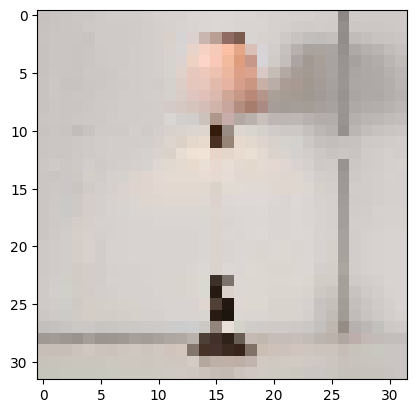

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted class: (array([18]), 'cups')


In [182]:
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np
import matplotlib.pyplot as plt
import cv2
import numpy as np


img = load_img('/content/tải xuống (6).jpeg', target_size=(32, 32))
plt.imshow(img)
plt.show()

img = img_to_array(img)
img = img.reshape(1, 32 * 32 * 3)
img = img.astype('float32')
img = img / 255.0
np.argmax(model.predict(img), axis=-1)
prediction = model.predict(img)
predicted_class_index = np.argmax(prediction, axis=-1)

def predict_image(image_path):
     img = load_img(image_path, target_size=(32, 32))
     img = img_to_array(img)
     img = img.reshape(1, 32 * 32 * 3)
     img = img.astype('float32')
     img = img / 255.0
     prediction = model.predict(img)
     predicted_class_index = np.argmax(prediction, axis=-1)
     predicted_class_label = class_labels[predicted_class_index[0]]
     return predicted_class_index, predicted_class_label

class_labels = ['beaver', 'dolphin', 'otter', 'seal', 'whale',
                'aquarium_fish', 'flatfish', 'ray', 'shark', 'trout',
                'orchids', 'poppies', 'roses', 'sunflowers', 'tulips',
                'bottles', 'bowls', 'cans', 'cups', 'plates',
                'apples', 'mushrooms', 'oranges', 'pears', 'sweet_pepper',
                'clock', 'computer_keyboard', 'lamp', 'telephone', 'television',
                'bed', 'chair', 'couch', 'table', 'wardrobe',
                'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach',
                'bear', 'leopard', 'lion', 'tiger', 'wolf',
                'bridge', 'castle', 'house', 'road', 'skyscraper',
                'cloud', 'forest', 'mountain', 'plain', 'sea',
                'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo',
                'fox', 'porcupine', 'possum', 'raccoon', 'skunk',
                'crab', 'lobster', 'snail', 'spider', 'worm',
                'baby', 'boy', 'girl', 'man', 'woman',
                'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle',
                'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel',
                'maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree',
                'bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train',
                'lawn_mower', 'rocket', 'streetcar', 'tank', 'tractor'
]


image_path = '/content/tải xuống (6).jpeg'
predicted_class_label = predict_image(image_path)
print(f"Predicted class: {predicted_class_label}")